In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [41]:
dataset = pd.read_csv('JezPrzymClass.csv')

In [42]:
dataset.shape

(59, 6)

In [43]:
dataset.head(5)

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti,Lake_class
0,1,0.03,0.0,0.0,0.00,Oligohaline
1,2,0.08,0.0,0.0,0.09,Oligohaline
2,3,0.06,0.0,0.0,0.08,Oligohaline
3,4,0.04,0.0,0.0,0.14,Oligohaline
4,5,0.02,0.0,0.0,0.00,Oligohaline


In [44]:
dataset.describe()

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,0.059831,0.000508,0.002203,0.066271
std,17.175564,0.069220,0.002216,0.007208,0.119624
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,0.020000,0.000000,0.000000,0.000000
50%,30.000000,0.040000,0.000000,0.000000,0.000000
75%,44.500000,0.070000,0.000000,0.000000,0.090000
max,59.000000,0.320000,0.010000,0.030000,0.580000


In [45]:
dataset.groupby('Lake_class').size()

Lake_class
Freshwater             29
Freshwater-isolated     5
Mesohaline             10
Oligohaline            15
dtype: int64

In [46]:
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

In [47]:
le = LabelEncoder()
y = le.fit_transform(y)

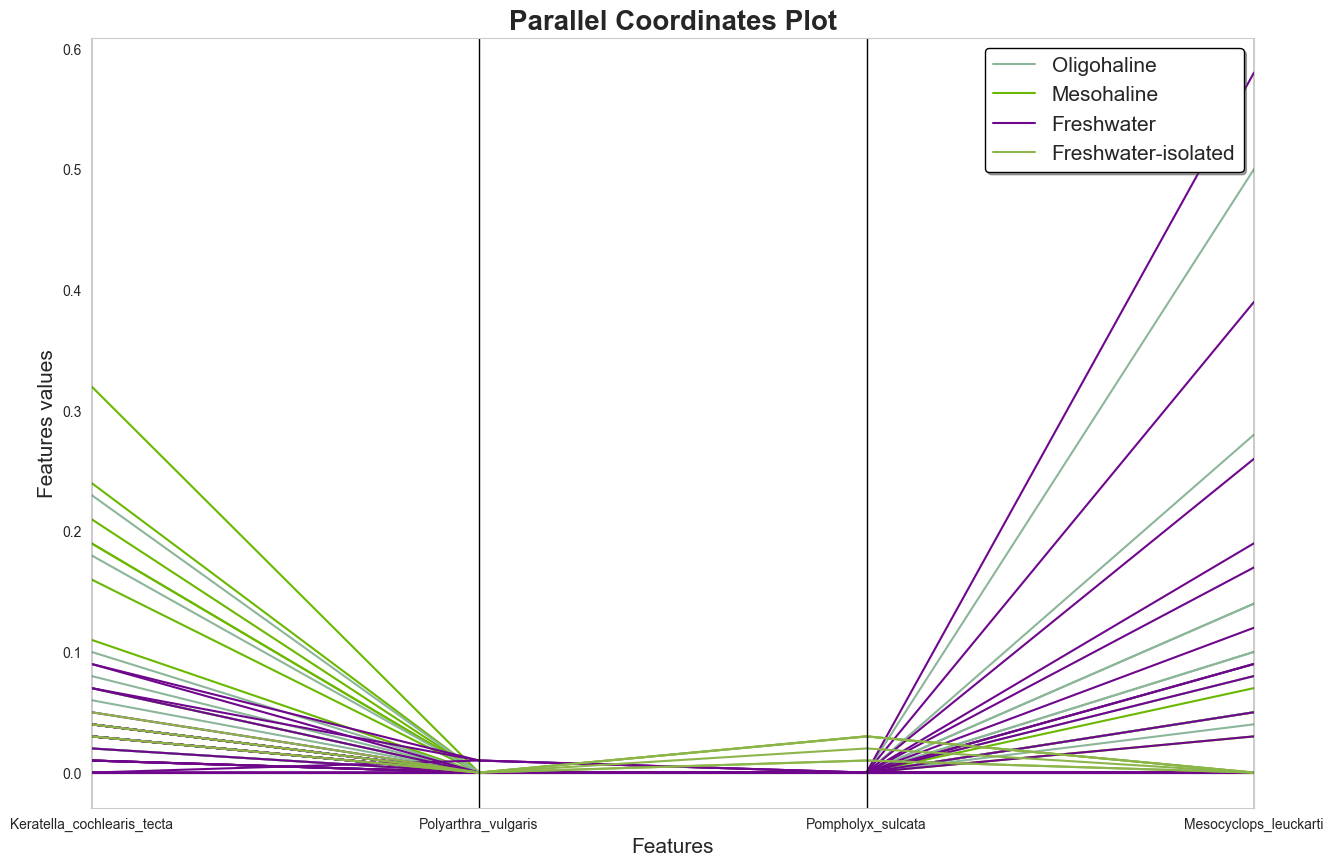

In [48]:
plt.figure(figsize=(15, 10))
parallel_coordinates(dataset.drop('Id', axis=1), 'Lake_class')
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

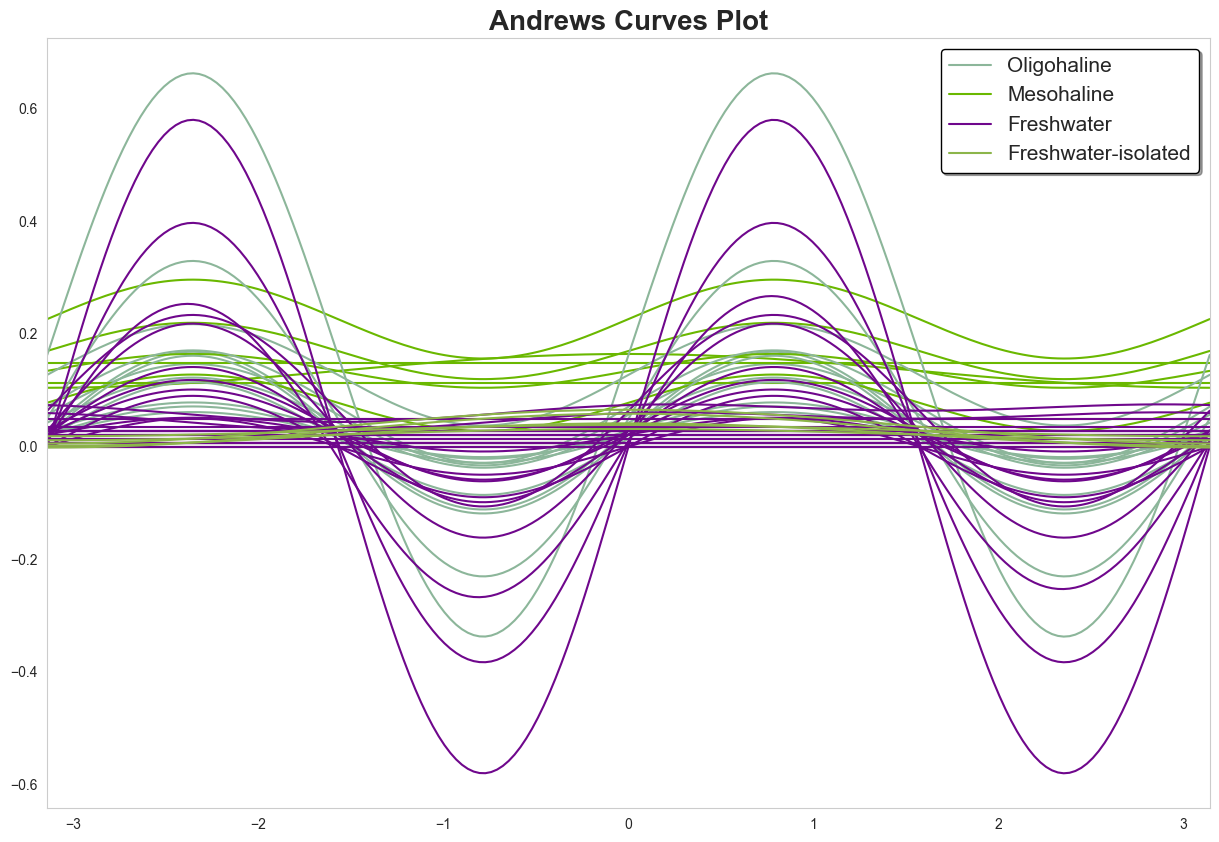

In [49]:
plt.figure(figsize=(15, 10))
andrews_curves(dataset.drop('Id', axis=1), 'Lake_class')
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

<Figure size 640x480 with 0 Axes>

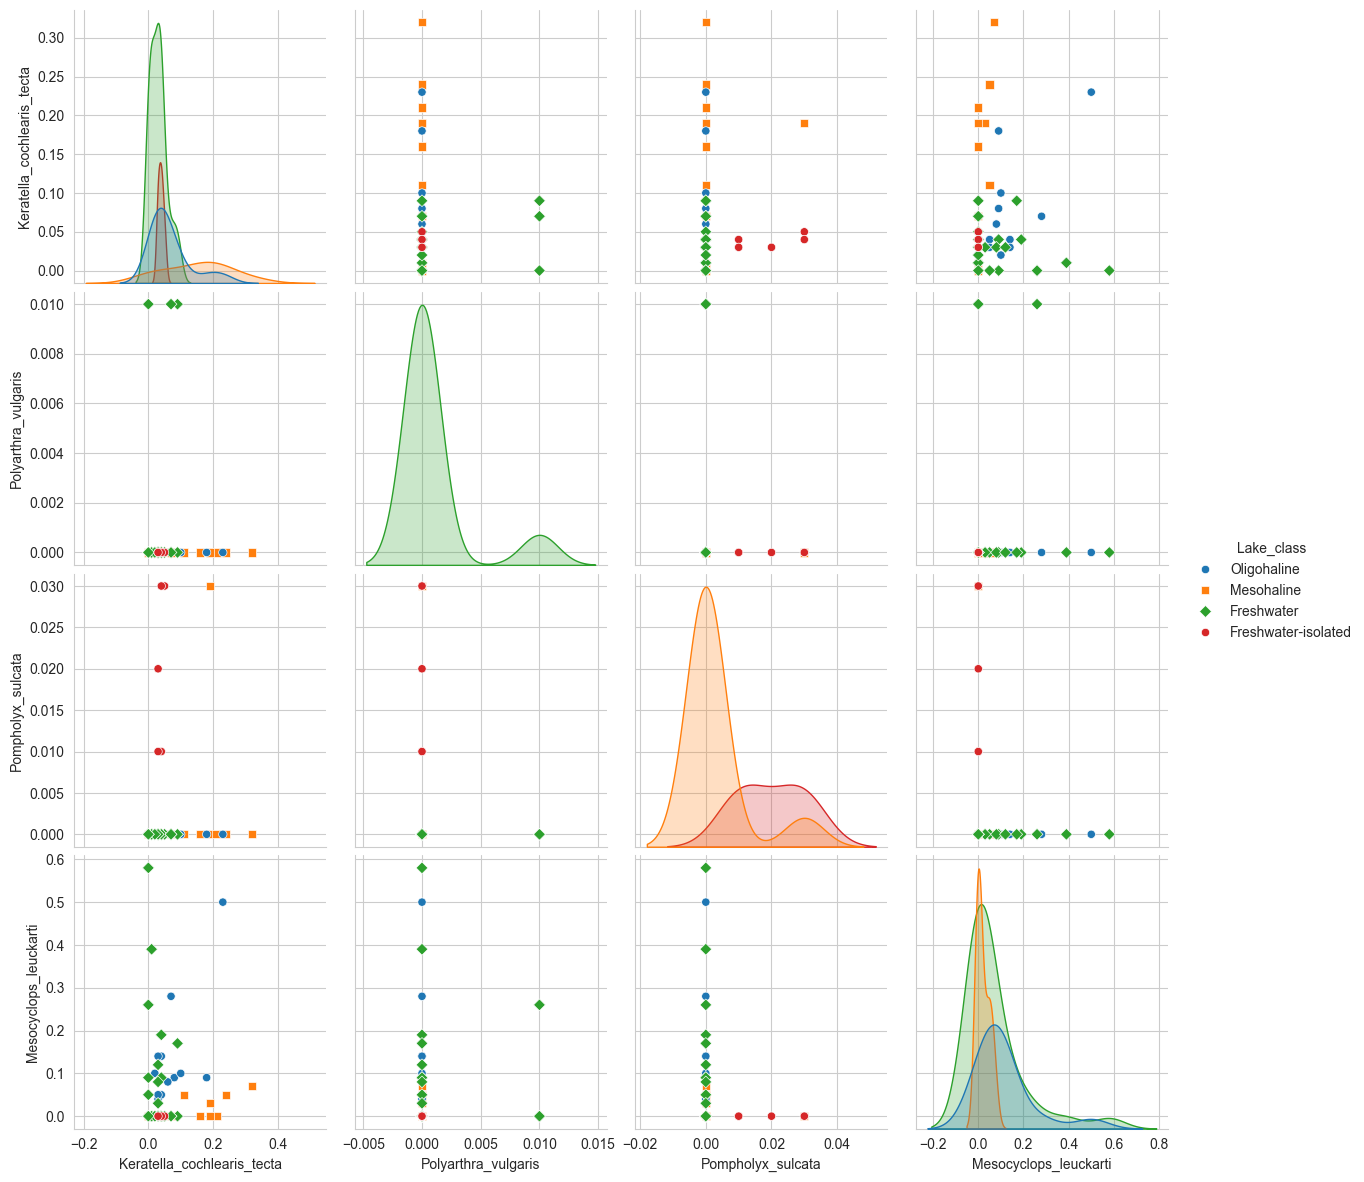

In [50]:
plt.figure()
sns.pairplot(dataset.drop('Id', axis=1), hue='Lake_class', height=3, markers=['o', 's', 'D'])
plt.show()

<Figure size 640x480 with 0 Axes>

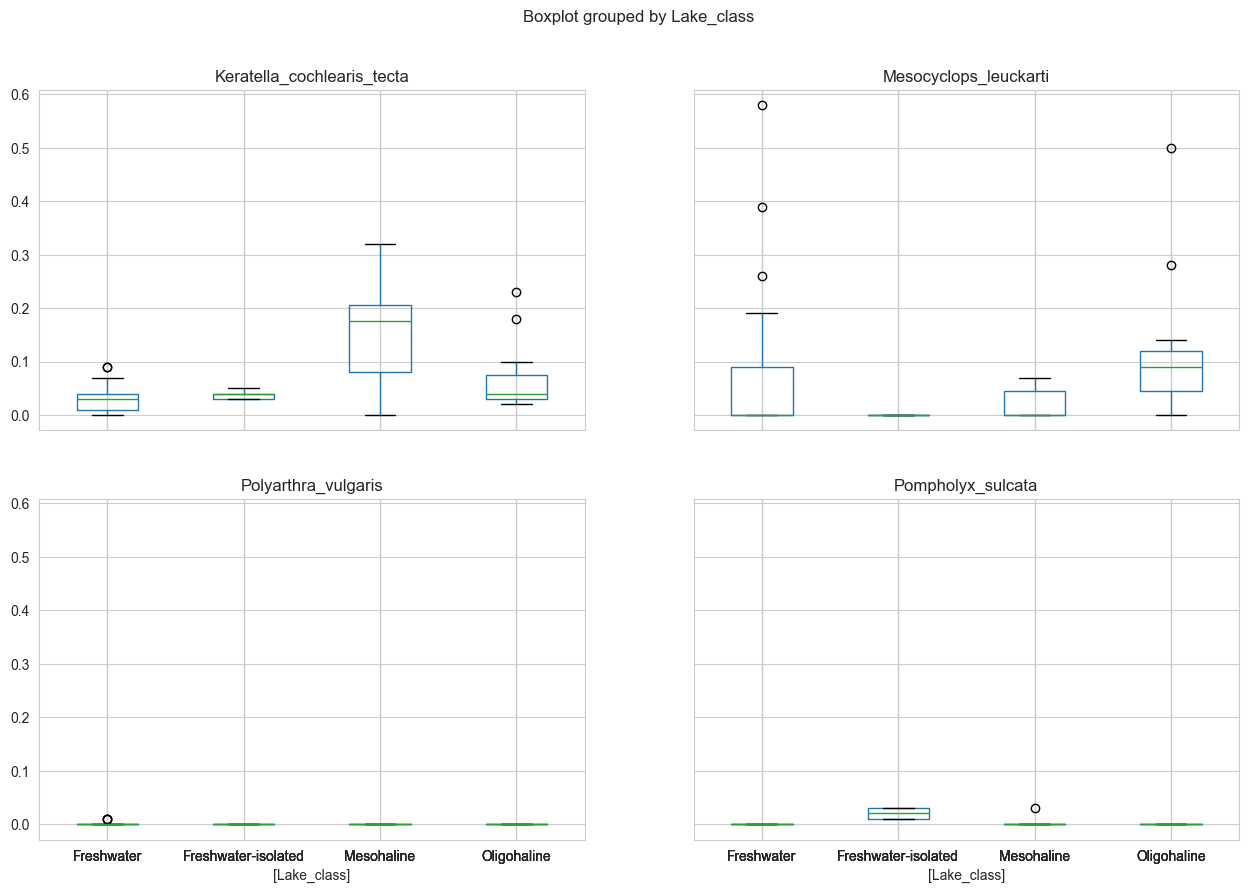

In [51]:
plt.figure()
dataset.drop('Id', axis=1).boxplot(by='Lake_class', figsize=(15, 10))
plt.show()

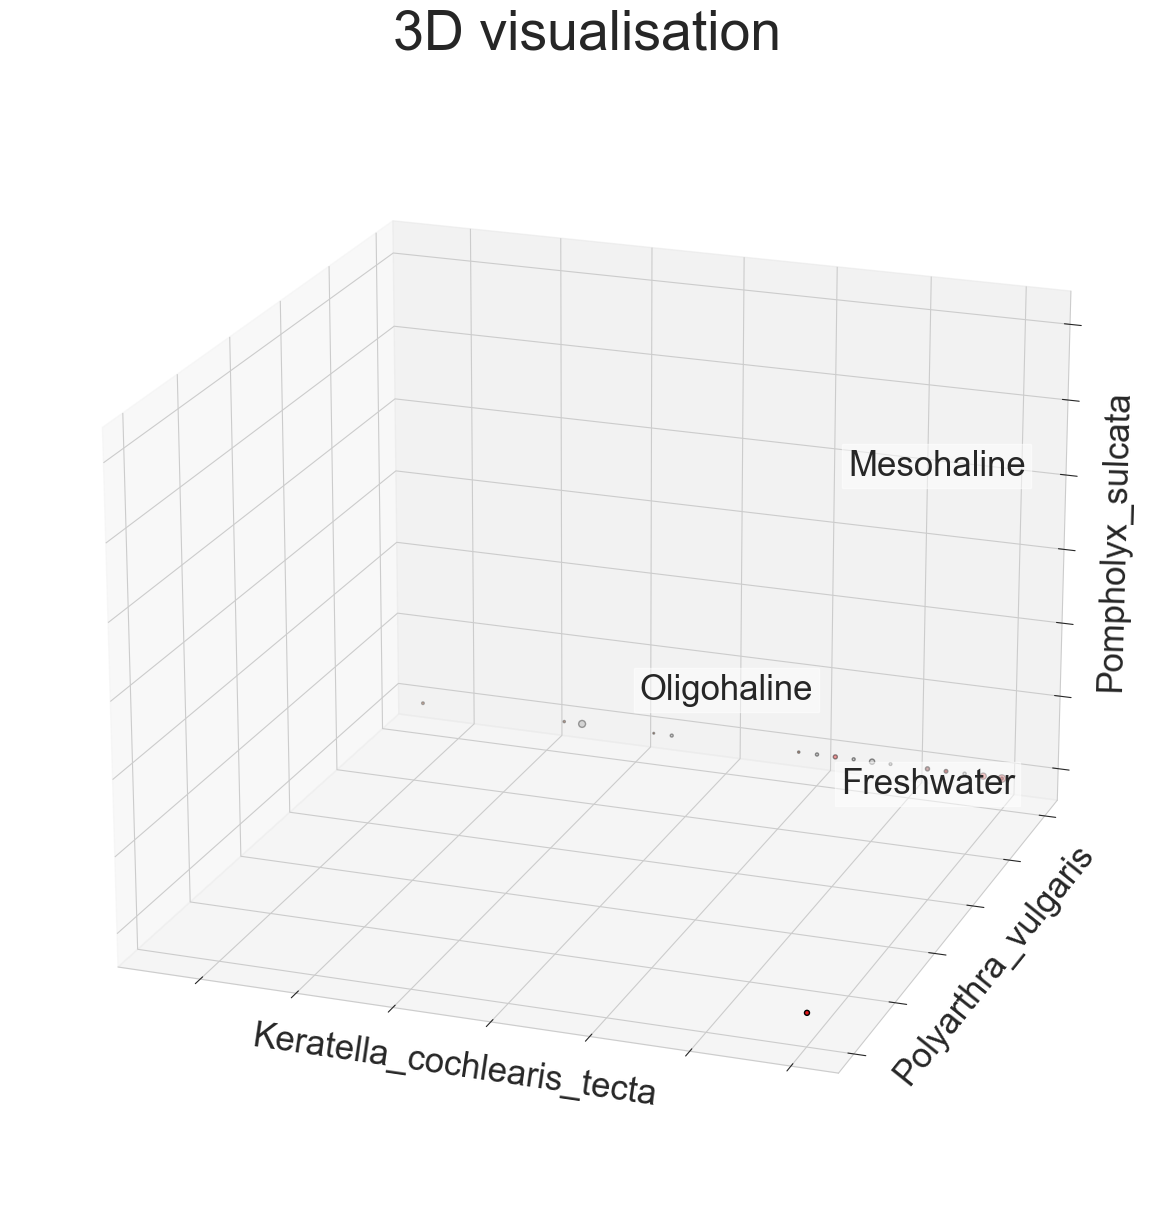

In [52]:
fig = plt.figure(1, figsize=(20, 15))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3]*50)

for name, label in [('Freshwater', 0), ('Mesohaline', 1), ('Oligohaline', 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
        size=25,
    )

ax.set_title('3D visualisation', fontsize=40)
ax.set_xlabel('Keratella_cochlearis_tecta', fontsize=25)
ax.xaxis.set_ticklabels([])
ax.set_ylabel('Polyarthra_vulgaris', fontsize=25)
ax.yaxis.set_ticklabels([])
ax.set_zlabel('Pompholyx_sulcata', fontsize=25)
ax.zaxis.set_ticklabels([])

plt.show()

In [53]:
classifier = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 0, 4],
       [1, 1, 0],
       [1, 0, 2]], dtype=int64)

In [55]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 50.0 %.


In [56]:
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

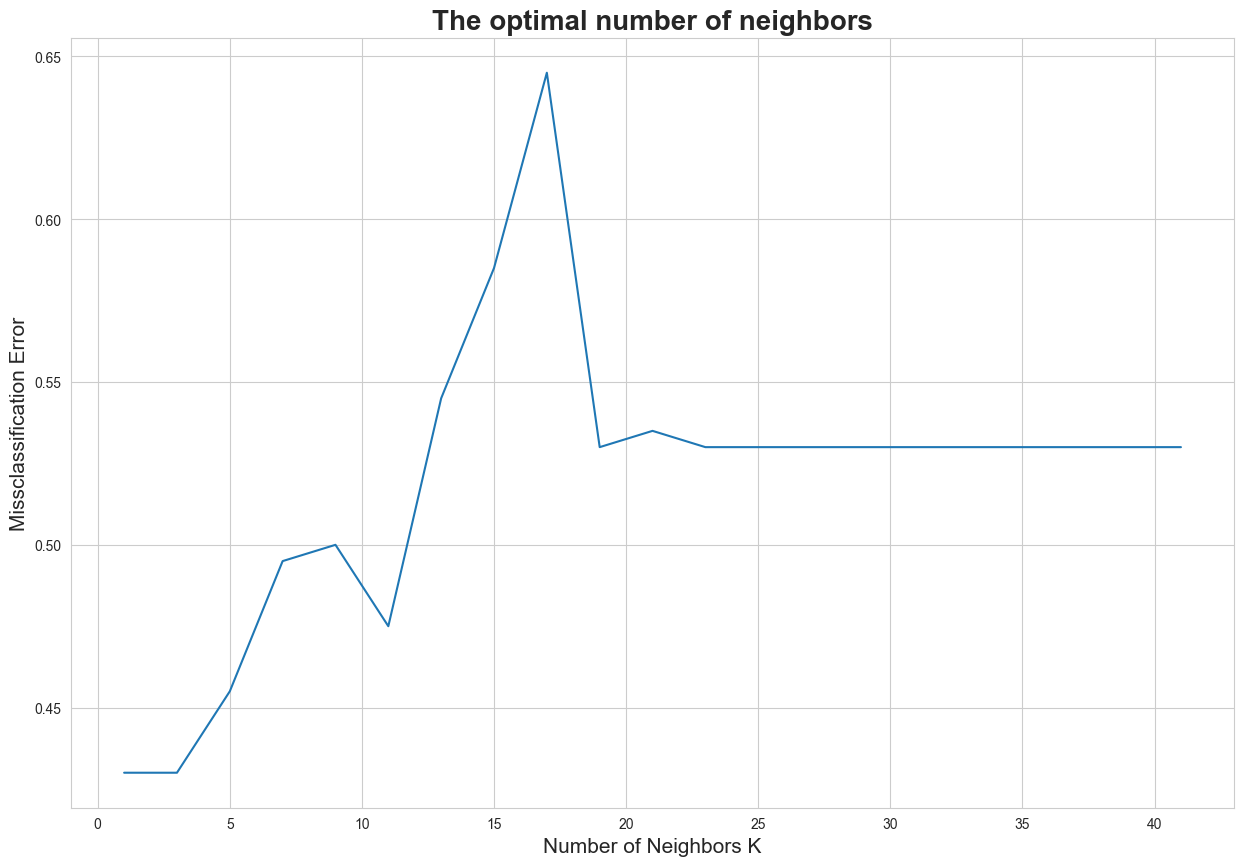

In [57]:
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Missclassification Error', fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list, MSE)

plt.show()

In [58]:
best_k = k_list[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {best_k}')

The optimal number of neighbors is 3
